In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# File Path to your Log File
log_file_path = "/kaggle/input/cifar-10-logs/download.txt"

# Regular Expressions to Extract Values
epoch_pattern = r"Epoch \[(\d+)/\d+\], Loss: ([\d\.]+), Accuracy: ([\d\.]+)%"
val_pattern = r"Validation Loss: ([\d\.]+), Validation Accuracy: ([\d\.]+)%"

# Lists to Store Extracted Values
epochs = []
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Read the Log File
with open(log_file_path, 'r') as file:
    log_data = file.readlines()

In [4]:
# Extract Training and Validation Data
for i, line in enumerate(log_data):
    epoch_match = re.search(epoch_pattern, line)
    val_match = re.search(val_pattern, line)

    if epoch_match:
        epochs.append(int(epoch_match.group(1)))
        train_losses.append(float(epoch_match.group(2)))
        train_accuracies.append(float(epoch_match.group(3)))

        # Ensure Alignment of Validation Data
        if i + 1 < len(log_data):                         # Check next line for validation data
            next_line = log_data[i + 1]
            val_match = re.search(val_pattern, next_line)
            if val_match:
                val_losses.append(float(val_match.group(1)))
                val_accuracies.append(float(val_match.group(2)))
            else:
                val_losses.append(np.nan)
                val_accuracies.append(np.nan)
    elif val_match:                                       # If a validation log appears before an epoch log, skip it
        continue

In [5]:
# Ensure Lists have Equal Lengths
while len(val_losses) < len(epochs):
    val_losses.append(np.nan)
while len(val_accuracies) < len(epochs):
    val_accuracies.append(np.nan)

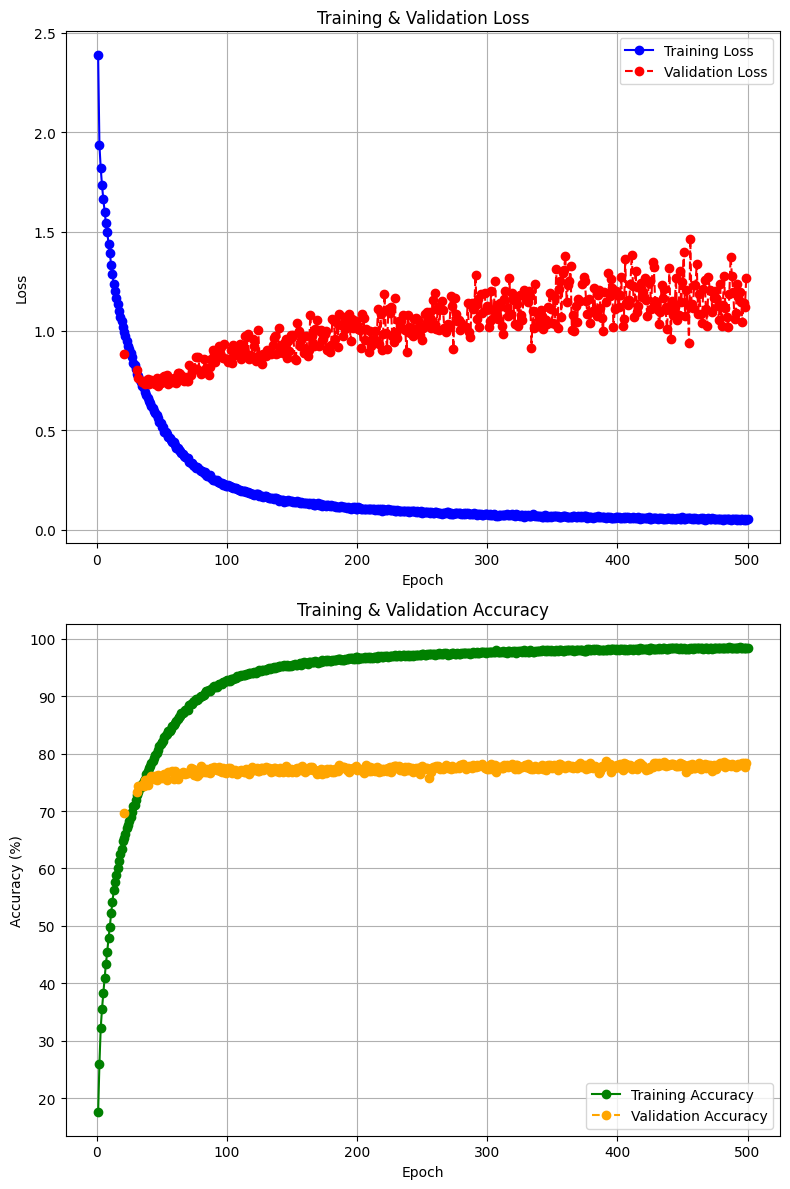

In [6]:
# Plotting
plt.figure(figsize=(8, 12))

# 1️⃣ Training and Validation Loss
plt.subplot(2, 1, 1)
plt.plot(epochs, train_losses, marker='o', label='Training Loss', color='blue')
plt.plot(epochs, val_losses, marker='o', label='Validation Loss', color='red', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid(True)

# 2️⃣ Training and Validation Accuracy
plt.subplot(2, 1, 2)
plt.plot(epochs, train_accuracies, marker='o', label='Training Accuracy', color='green')
plt.plot(epochs, val_accuracies, marker='o', label='Validation Accuracy', color='orange', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()